In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from ISLP import confusion_table
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import gdown

In [3]:
# C1: tự động tải và load data
file_id = '1GU-ty9O5bmLGvXfvJj6SuQ-UyHb9RTh9'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data.csv'

gdown.download(url, output, quiet=False)
data = pd.read_csv('data.csv')
X = data.drop(["HeartDiseaseorAttack"], axis=1).to_numpy()
y = data[['HeartDiseaseorAttack']].to_numpy().flatten()
print(X.shape, y.shape)
data

Downloading...
From: https://drive.google.com/uc?id=1GU-ty9O5bmLGvXfvJj6SuQ-UyHb9RTh9
To: c:\Users\ADMIN\OneDrive\Machine Learning\machine_learning\final_term\data.csv
100%|██████████| 22.7M/22.7M [00:12<00:00, 1.84MB/s]


(253680, 21) (253680,)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
# C2: tải file data về thư mục và load data
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
X = data.drop(["HeartDiseaseorAttack"], axis=1).to_numpy()
y = data[['HeartDiseaseorAttack']].to_numpy().flatten()
print(X.shape, y.shape)
data

(253680, 21) (253680,)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
def print_measurements(y_true, y_hat):
    print("Accuracy:", accuracy_score(y_true, y_hat))
    print("F1:", f1_score(y_true, y_hat))
    print("Precision:", precision_score(y_true, y_hat))
    print("Recall:", recall_score(y_true, y_hat))

In [23]:
data.columns[1:].tolist()

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

for c in data.columns:
    if c in ["HeartDiseaseorAttack", "BMI", "PhysHlth", "MentHlth", "Age", "Income"]:
        continue
    v = cramers_v(data[c], data.HeartDiseaseorAttack)
    print(f"{c}: {v}")

HighBP: 0.20934757663332815
HighChol: 0.18075170084172862
CholCheck: 0.04417021381666296
Smoker: 0.11442763377552459
Stroke: 0.2029677374239082
Diabetes: 0.18028072456817593
PhysActivity: 0.08728326359910057
Fruits: 0.01977633749436709
Veggies: 0.039150158556594365
HvyAlcoholConsump: 0.028961215136325394
AnyHealthcare: 0.018702910747841278
NoDocbcCost: 0.030975401209260078
GenHlth: 0.27373288551357966
DiffWalk: 0.21269065576836318
Sex: 0.08608191513791563
Education: 0.1010390252078975


In [25]:
from scipy.stats import pointbiserialr

for c in data.columns:
    if c in ["BMI", "PhysHlth", "MentHlth", "Age", "Income"]:
        r_pb, p_value = pointbiserialr(data[c], data.HeartDiseaseorAttack)
        print(f"{c}: {r_pb:.3f}, p-value: {p_value:.3g}")


BMI: 0.053, p-value: 1.21e-156
MentHlth: 0.065, p-value: 7.5e-233
PhysHlth: 0.182, p-value: 0
Age: 0.222, p-value: 0
Income: -0.141, p-value: 0


# Normalize

Do làm việc với các thuật toán dựa trên khoảng cách rất nhiều nên cần chuẩn hóa.

In [26]:
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
X_normalized.shape

(253680, 21)

# Clustering
## Kmeans
Do tính toán điểm bóng mờ rất tốn thời gian nên ta tiến hành phân cụm trên bộ dữ liệu thu gọn.

In [27]:
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(X_normalized, y, stratify=y, train_size=0.1, random_state=42, shuffle=True)
print(X_small.shape, y_small.shape)

counter = Counter(y_small)
print(counter)

(25368, 21) (25368,)
Counter({0.0: 22979, 1.0: 2389})


In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
import matplotlib.pyplot as plt

sil = []
dbi = []
ch = []
ari = []
nmi = []
fmi = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_small)
    labels = kmeans.predict(X_small)
    sil.append(silhouette_score(X_small, labels, sample_size=9000))
    dbi.append(davies_bouldin_score(X_small, labels))
    ch.append(calinski_harabasz_score(X_small, labels))
    ari.append(adjusted_rand_score(y_small, labels))
    nmi.append(normalized_mutual_info_score(y_small, labels))
    fmi.append(fowlkes_mallows_score(y_small, labels))

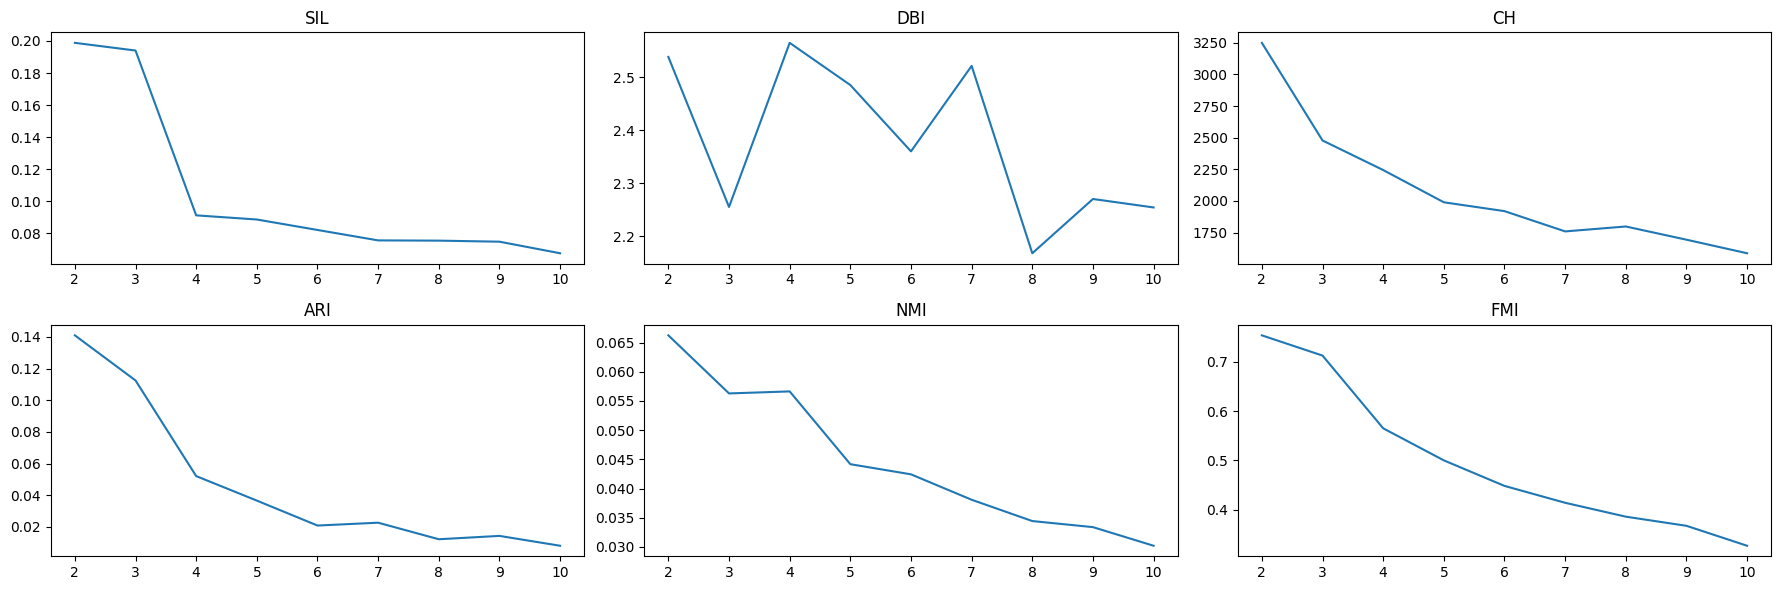

In [141]:
plots = {
    'SIL': sil,
    'DBI': dbi,
    'CH': ch,
    'ARI': ari,
    'NMI': nmi,
    'FMI': fmi
}

fig, axes = plt.subplots(2, 3, figsize=(18, 6))
axes = axes.flatten()
for i, name in enumerate(plots):
    axes[i].plot(K, plots[name])
    axes[i].set_title(name)
plt.tight_layout()
plt.show()

Dựa vào hình trên, ta thấy rằng K = 2 được nhiều thang đo đồng ý nhất. Vậy nên, ta chọn K = 2 là số cụm tối ưu.

In [147]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_small)
labels = kmeans.predict(X_small)
print("Silhouette Score:", silhouette_score(X_small, labels))
print("DBI:", davies_bouldin_score(X_small, labels))
print("CH:", calinski_harabasz_score(X_small, labels))
print("ARI:", adjusted_rand_score(y_small, labels))
print("NMI:", normalized_mutual_info_score(y_small, labels))
print("FMI:", fowlkes_mallows_score(y_small, labels))

Silhouette Score: 0.1983924559410457
DBI: 2.538366576482626
CH: 3248.7357521224885
ARI: 0.14101388710198876
NMI: 0.0662305023764779
FMI: 0.7540077524155492


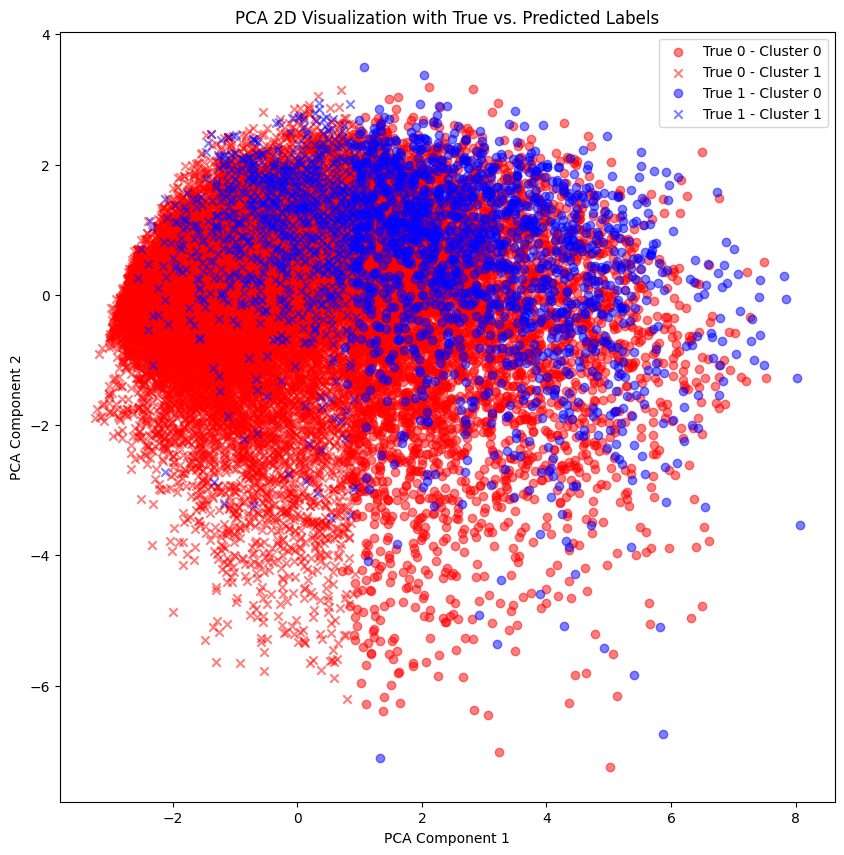

In [158]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2D
X2d = PCA(n_components=2, random_state=42).fit_transform(X_small)

# Phân chia theo nhãn thực (y_small) và nhãn dự đoán/phân cụm (labels)
X00 = X2d[(y_small == 0) & (labels == 0)]
X01 = X2d[(y_small == 0) & (labels == 1)]
X10 = X2d[(y_small == 1) & (labels == 0)]
X11 = X2d[(y_small == 1) & (labels == 1)]

# Vẽ biểu đồ
fig = plt.figure(figsize=(10, 10))
plt.scatter(X00[:, 0], X00[:, 1], c="red", marker="o", label="True 0 - Cluster 0", alpha=0.5)
plt.scatter(X01[:, 0], X01[:, 1], c="red", marker="x", label="True 0 - Cluster 1", alpha=0.5)
plt.scatter(X10[:, 0], X10[:, 1], c="blue", marker="o", label="True 1 - Cluster 0", alpha=0.5)
plt.scatter(X11[:, 0], X11[:, 1], c="blue", marker="x", label="True 1 - Cluster 1", alpha=0.5)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA 2D Visualization with True vs. Predicted Labels")
plt.legend()
plt.show()


Các điểm số chưa phải là tốt. Ngoài ra, có vẻ như KMeans phân cụm dữ liệu theo chiều ngang, trong khi dữ liệu thực tế được phân chia theo chiều dọc. Có thể kết luận rằng thuật toán KMeans không phù hợp với dữ liệu này. Mặc dù vậy, bản chất dữ liệu cũng chồng chất lên nhau khá nhiều dẫn đến việc khó phân cụm.
## DB Scan

In [36]:
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
import matplotlib.pyplot as plt

sil = []
dbi = []
ch = []
ari = []
nmi = []
fmi = []
eps = np.arange(0.05, 0.95, 0.05)
for ep in eps:
    db = DBSCAN(eps=ep, min_samples=9).fit(X_small)
    labels = db.labels_
    sil.append(silhouette_score(X_small, labels, sample_size=9000))
    dbi.append(davies_bouldin_score(X_small, labels))
    ch.append(calinski_harabasz_score(X_small, labels))
    ari.append(adjusted_rand_score(y_small, labels))
    nmi.append(normalized_mutual_info_score(y_small, labels))
    fmi.append(fowlkes_mallows_score(y_small, labels))

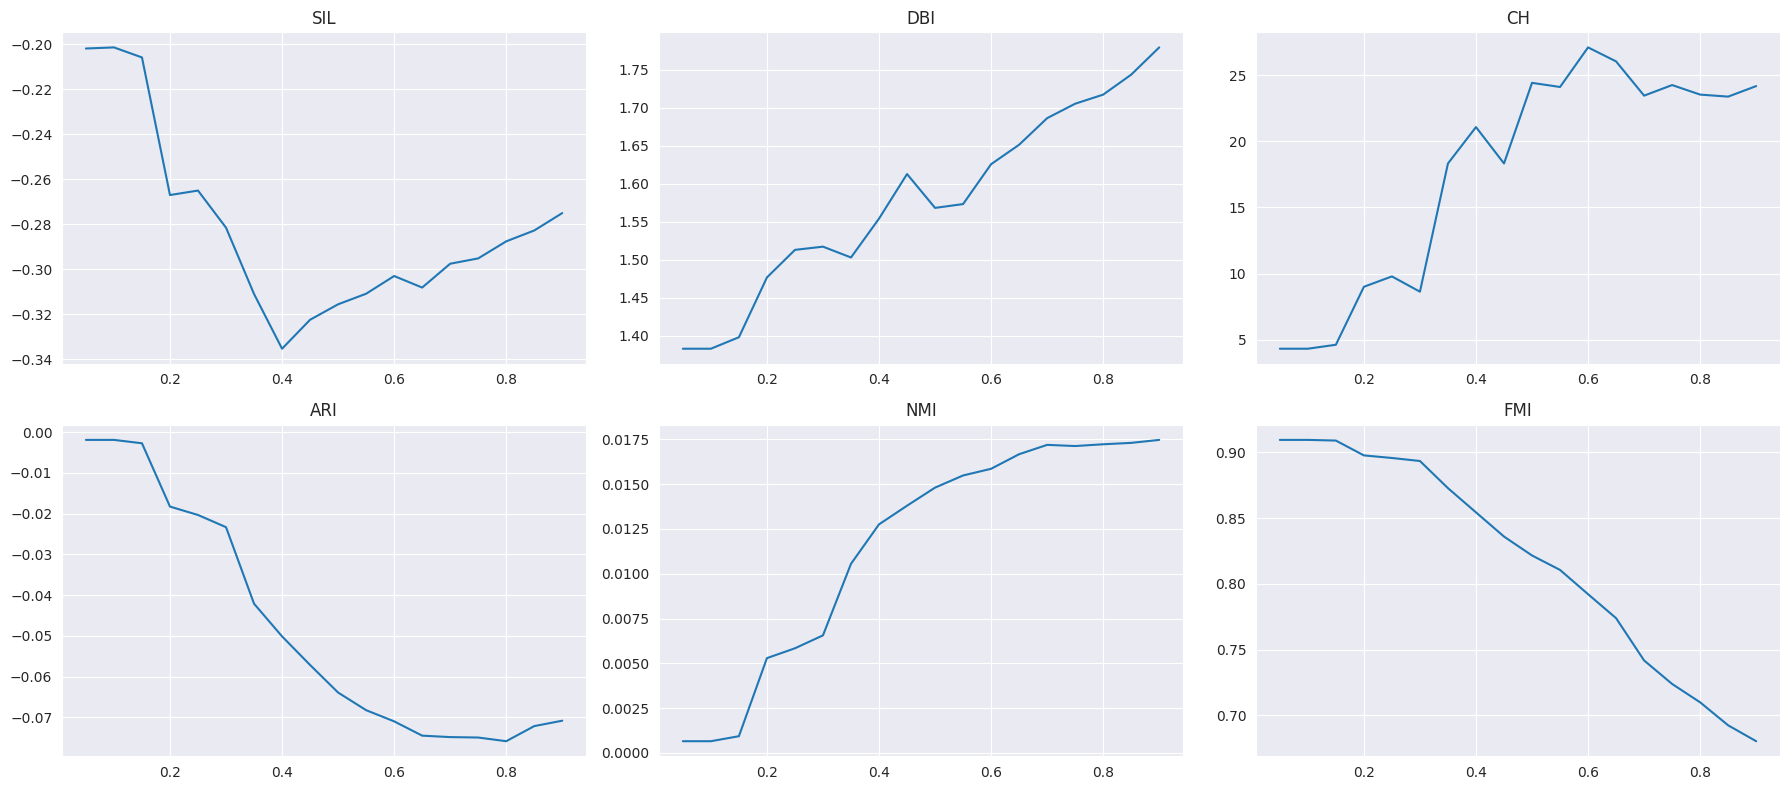

In [37]:
plots = {
    'SIL': sil,
    'DBI': dbi,
    'CH': ch,
    'ARI': ari,
    'NMI': nmi,
    'FMI': fmi
}

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()
for i, name in enumerate(plots):
    axes[i].plot(eps, plots[name])
    axes[i].set_title(name)
plt.tight_layout()
plt.show()

In [39]:
db = DBSCAN(eps=0.2, min_samples=9).fit(X_small)
labels = db.labels_
print("Silhouette Score:", silhouette_score(X_small, labels))
print("DBI:", davies_bouldin_score(X_small, labels))
print("CH:", calinski_harabasz_score(X_small, labels))
print("ARI:", adjusted_rand_score(y_small, labels))
print("NMI:", normalized_mutual_info_score(y_small, labels))
print("FMI:", fowlkes_mallows_score(y_small, labels))


Silhouette Score: -0.265734741767881
DBI: 1.4766152936629269
CH: 8.993790708042429
ARI: -0.01826436136383842
NMI: 0.005290748261474045
FMI: 0.8977592771232824


Kết quả từ DB Scan thậm chí còn kém hơn KMeans

# SVM
## Linear SVM
### Dữ liệu gốc

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from ISLP import confusion_table

In [30]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7470533743298644
F1: 0.3734560367133721
Precision: 0.2435448438345697
Recall: 0.8004080778486973

Test Results
Accuracy: 0.7481472721538946
F1: 0.3752200273811852
Precision: 0.24481592547693484
Recall: 0.802887633396108
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     45957
         1.0       0.24      0.80      0.38      4779

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736

Truth        0.0   1.0
Predicted             
0.0        34121   942
1.0        11836  3837


In [40]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7473250889759877
F1: 0.3738888966412235
Precision: 0.2438567112017183
Recall: 0.80101644245142

Test Results
Accuracy: 0.7465573425838327
F1: 0.3733186041978036
Precision: 0.24332909783989834
Recall: 0.8014787946428571
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     68936
         1.0       0.24      0.80      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

Truth        0.0   1.0
Predicted             
0.0        51071  1423
1.0        17865  5745


In [41]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7464390833596132
F1: 0.3732094715301913
Precision: 0.24323637749269655
Recall: 0.8014787946428571

Test Results
Accuracy: 0.7455751340271208
F1: 0.3729628640128239
Precision: 0.24285172064777327
Recall: 0.8033901852045621
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     91915
         1.0       0.24      0.80      0.37      9557

    accuracy                           0.75    101472
   macro avg       0.61      0.77      0.61    101472
weighted avg       0.90      0.75      0.80    101472

Truth        0.0   1.0
Predicted             
0.0        67977  1879
1.0        23938  7678


Kết quả giống nhau trên các tập train-test với nhiều tỉ lệ. Kết quả test gần sát với kết quả train cho thấy mô hình không bị overfit.

### Dữ liệu giảm chỉều PCA

In [42]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=6).fit_transform(X_normalized)
X_pca.shape

(253680, 6)

In [43]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.737390610217597
F1: 0.35594387847587283
Precision: 0.23142924491239097
Recall: 0.7704823689442294

Test Results
Accuracy: 0.739672027751498
F1: 0.3582742201924011
Precision: 0.23331013098778713
Recall: 0.7715003138731952
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     45957
         1.0       0.23      0.77      0.36      4779

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.74      0.79     50736

Truth        0.0   1.0
Predicted             
0.0        33841  1092
1.0        12116  3687


In [44]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7375996756318421
F1: 0.3566043467454641
Precision: 0.231843725873925
Recall: 0.7720777279521674

Test Results
Accuracy: 0.7376222011983601
F1: 0.3562447611064543
Precision: 0.23165618448637318
Recall: 0.7707868303571429
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     68936
         1.0       0.23      0.77      0.36      7168

    accuracy                           0.74     76104
   macro avg       0.60      0.75      0.60     76104
weighted avg       0.90      0.74      0.79     76104

Truth        0.0   1.0
Predicted             
0.0        50611  1643
1.0        18325  5525


In [45]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.736741826973615
F1: 0.3558706275720165
Precision: 0.2312207553475936
Recall: 0.7721121651785714

Test Results
Accuracy: 0.7370309050772627
F1: 0.35632960247008877
Precision: 0.2315433085676667
Recall: 0.7728366642251753
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     91915
         1.0       0.23      0.77      0.36      9557

    accuracy                           0.74    101472
   macro avg       0.60      0.75      0.60    101472
weighted avg       0.90      0.74      0.79    101472

Truth        0.0   1.0
Predicted             
0.0        67402  2171
1.0        24513  7386


Kết quả trên dữ liệu giảm chiều cũng không bị xảy ra tình trạng overfit. Kết quả giống nhau giữa các tập train-test đa dạng tỉ lệ. Tuy nhiên, kết quả trên bộ dữ liệu giảm chiều kém hơn dữ liệu gốc.

### Dữ liệu giảm chiều LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda = LinearDiscriminantAnalysis(n_components=1).fit_transform(X_normalized, y)
X_lda.shape

(253680, 1)

In [48]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7735335856196783
F1: 0.3829878638169907
Precision: 0.2575938165926247
Recall: 0.7462592863869415

Test Results
Accuracy: 0.7724101229895932
F1: 0.3818191552010279
Precision: 0.25654676258992803
Recall: 0.7461812094580457
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86     45957
         1.0       0.26      0.75      0.38      4779

    accuracy                           0.77     50736
   macro avg       0.61      0.76      0.62     50736
weighted avg       0.90      0.77      0.82     50736

Truth        0.0   1.0
Predicted             
0.0        35623  1213
1.0        10334  3566


In [50]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7737532098932288
F1: 0.3833875621585119
Precision: 0.2578926720488943
Recall: 0.7467862481315396

Test Results
Accuracy: 0.7718516766530011
F1: 0.38097614888231307
Precision: 0.2558785498778794
Recall: 0.7453962053571429
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86     68936
         1.0       0.26      0.75      0.38      7168

    accuracy                           0.77     76104
   macro avg       0.61      0.76      0.62     76104
weighted avg       0.90      0.77      0.82     76104

Truth        0.0   1.0
Predicted             
0.0        53398  1825
1.0        15538  5343


In [51]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_train, y_train)
y_train_hat = lin_svm.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = lin_svm.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7728831598864712
F1: 0.38215581490947437
Precision: 0.256902559173375
Recall: 0.7457449776785714

Test Results
Accuracy: 0.7726564963733837
F1: 0.38319831020560946
Precision: 0.2573624479241488
Recall: 0.7498168881448153
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86     91915
         1.0       0.26      0.75      0.38      9557

    accuracy                           0.77    101472
   macro avg       0.61      0.76      0.62    101472
weighted avg       0.90      0.77      0.82    101472

Truth        0.0   1.0
Predicted             
0.0        71237  2391
1.0        20678  7166


Kết quả tương tự nhau trên các tập train-test đa dạng tỉ lệ. Mô hình không bị overfit. Kết quả của LDA cho điểm F1 so với dữ liệu gốc và dữ liệu PCA. Tuy nhiên, Recall của phân lớp 1 lại thấp hơn.

Do tất cả các mô hình đều không bị overfit nên ta không cần hiệu chỉnh thêm. Trên thực tế, đối với mô hình SVM tuyến tính, việc chọn C nhỏ (Soft Margin SVM) cũng đã là một cách hiệu chỉnh để tránh overfit.

## Polynomial SVM
### Dữ liệu gốc
Do huấn luyện bằng thuật toán này rất lâu nên ta tiến hành thu gọn số lượng mẫu, chỉ chọn ra những đại diện để huấn luyện.

In [108]:
from collections import Counter
from sklearn.svm import SVC

X_small, _, y_small, _ = train_test_split(X_normalized, y, stratify=y, train_size=0.1, random_state=42, shuffle=True)
print(X_small.shape, y_small.shape)

counter = Counter(y_small)
print(counter)

(25368, 21) (25368,)
Counter({0.0: 22979, 1.0: 2389})


In [111]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.2)

svc = SVC(kernel="poly", degree=2, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7553956834532374
F1: 0.3556593977154725
Precision: 0.236492318315208
Recall: 0.716902145473574

Test Results
Accuracy: 0.7483247930626724
F1: 0.34747061829330605
Precision: 0.22988505747126436
Recall: 0.7112970711297071
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84      4596
         1.0       0.23      0.71      0.35       478

    accuracy                           0.75      5074
   macro avg       0.60      0.73      0.60      5074
weighted avg       0.89      0.75      0.80      5074

Truth       0.0  1.0
Predicted           
0.0        3457  138
1.0        1139  340


In [112]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.3)

svc = SVC(kernel="poly", degree=2, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7617277693304049
F1: 0.3603930461073318
Precision: 0.24114909973700183
Recall: 0.7129186602870813

Test Results
Accuracy: 0.7528577059519117
F1: 0.3402314977200982
Precision: 0.22727272727272727
Recall: 0.6764295676429568
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85      6894
         1.0       0.23      0.68      0.34       717

    accuracy                           0.75      7611
   macro avg       0.59      0.72      0.59      7611
weighted avg       0.89      0.75      0.80      7611

Truth       0.0  1.0
Predicted           
0.0        5245  232
1.0        1649  485


In [113]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.4)

svc = SVC(kernel="poly", degree=2, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7703022339027595
F1: 0.3694083694083694
Precision: 0.2490878131841401
Recall: 0.7145847871598046

Test Results
Accuracy: 0.762317698068585
F1: 0.34456521739130436
Precision: 0.2327459618208517
Recall: 0.6631799163179917
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85      9192
         1.0       0.23      0.66      0.34       956

    accuracy                           0.76     10148
   macro avg       0.59      0.72      0.60     10148
weighted avg       0.89      0.76      0.81     10148

Truth       0.0  1.0
Predicted           
0.0        7102  322
1.0        2090  634


Trong quá trình thử nghiệm, ta thử cài đặt hai tham số là `degree` và C. Kết quả cho thấy số bậc cao (3, 4) và C cao dẫn đến overfit. Khi điều chỉnh C=0.1 và số bậc là 2 thì không còn tình trạng overfit nữa.

### Dữ liệu giảm chiều PCA

In [114]:
X_pca = PCA(n_components=6).fit_transform(X_small)
X_pca.shape

(25368, 6)

In [115]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.2)

svc = SVC(kernel="poly", degree=2, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7863900660293683
F1: 0.2979757085020243
Precision: 0.21575984990619138
Recall: 0.48142333856619574

Test Results
Accuracy: 0.7946393378005518
F1: 0.31357048748353095
Precision: 0.22884615384615384
Recall: 0.497907949790795
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88      4596
         1.0       0.23      0.50      0.31       478

    accuracy                           0.79      5074
   macro avg       0.58      0.66      0.60      5074
weighted avg       0.87      0.79      0.83      5074

Truth       0.0  1.0
Predicted           
0.0        3794  240
1.0         802  238


In [116]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.3)

svc = SVC(kernel="poly", degree=2, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7838035704229318
F1: 0.30060120240480964
Precision: 0.21613832853025935
Recall: 0.4934210526315789

Test Results
Accuracy: 0.788726842727631
F1: 0.3020833333333333
Precision: 0.21928166351606806
Recall: 0.48535564853556484
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88      6894
         1.0       0.22      0.49      0.30       717

    accuracy                           0.79      7611
   macro avg       0.58      0.65      0.59      7611
weighted avg       0.87      0.79      0.82      7611

Truth       0.0  1.0
Predicted           
0.0        5655  369
1.0        1239  348


In [117]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.4)

svc = SVC(kernel="poly", degree=2, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7877792378449409
F1: 0.30775825117873984
Precision: 0.22208475100525826
Recall: 0.5010467550593162

Test Results
Accuracy: 0.7893180922349231
F1: 0.2948548812664908
Precision: 0.2153179190751445
Recall: 0.4675732217573222
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88      9192
         1.0       0.22      0.47      0.29       956

    accuracy                           0.79     10148
   macro avg       0.58      0.65      0.59     10148
weighted avg       0.87      0.79      0.82     10148

Truth       0.0  1.0
Predicted           
0.0        7563  509
1.0        1629  447


Việc giảm chiều ảnh hưởng khá nặng tới Polynomial SVM, nặng hơn nhiều so với Linear SVM. Nguyên nhân là do mối quan hệ bậc cao giữa các chiều (được đo bằng tích vô hướng) sẽ bị ảnh hưởng nặng hơn là bậc thấp.

## Radial Basis Function SVM
### Dữ liệu gốc

In [118]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.2)

svc = SVC(kernel="rbf", gamma=0.1, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7286390066029368
F1: 0.3768247142695485
Precision: 0.24039849841178168
Recall: 0.8712715855572999

Test Results
Accuracy: 0.7230981474182104
F1: 0.369106421194432
Precision: 0.23499142367066894
Recall: 0.8598326359832636
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82      4596
         1.0       0.23      0.86      0.37       478

    accuracy                           0.72      5074
   macro avg       0.61      0.78      0.60      5074
weighted avg       0.91      0.72      0.78      5074

Truth       0.0  1.0
Predicted           
0.0        3258   67
1.0        1338  411


In [119]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.3)

svc = SVC(kernel="rbf", gamma=0.1, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7327251224869066
F1: 0.3802559414990859
Precision: 0.24323421316404945
Recall: 0.8708133971291866

Test Results
Accuracy: 0.7232952305873078
F1: 0.36528028933092227
Precision: 0.23298731257208766
Recall: 0.8451882845188284
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82      6894
         1.0       0.23      0.85      0.37       717

    accuracy                           0.72      7611
   macro avg       0.61      0.78      0.59      7611
weighted avg       0.91      0.72      0.78      7611

Truth       0.0  1.0
Predicted           
0.0        4899  111
1.0        1995  606


In [120]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.4)

svc = SVC(kernel="rbf", gamma=0.1, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7361366622864651
F1: 0.38348173165489713
Precision: 0.24581775241094272
Recall: 0.8715980460572226

Test Results
Accuracy: 0.7265471028774143
F1: 0.36280137772675086
Precision: 0.23242130038246542
Recall: 0.8263598326359832
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      9192
         1.0       0.23      0.83      0.36       956

    accuracy                           0.73     10148
   macro avg       0.60      0.77      0.59     10148
weighted avg       0.91      0.73      0.78     10148

Truth       0.0  1.0
Predicted           
0.0        6583  166
1.0        2609  790


### Dữ liệu giảm chiều PCA

In [121]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.2)

svc = SVC(kernel="rbf", gamma=0.1, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7064649650142899
F1: 0.34473655263447367
Precision: 0.2182451253481894
Recall: 0.8199895342752486

Test Results
Accuracy: 0.7132439889633425
F1: 0.35704816615112683
Precision: 0.22633053221288515
Recall: 0.8451882845188284
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82      4596
         1.0       0.23      0.85      0.36       478

    accuracy                           0.71      5074
   macro avg       0.60      0.77      0.59      5074
weighted avg       0.91      0.71      0.77      5074

Truth       0.0  1.0
Predicted           
0.0        3215   74
1.0        1381  404


In [122]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.3)

svc = SVC(kernel="rbf", gamma=0.1, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7106493213943796
F1: 0.3461440570119623
Precision: 0.21985127707727126
Recall: 0.8133971291866029

Test Results
Accuracy: 0.7138352384706346
F1: 0.35332541567695963
Precision: 0.22444360618634476
Recall: 0.8298465829846583
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82      6894
         1.0       0.22      0.83      0.35       717

    accuracy                           0.71      7611
   macro avg       0.60      0.77      0.58      7611
weighted avg       0.90      0.71      0.77      7611

Truth       0.0  1.0
Predicted           
0.0        4838  122
1.0        2056  595


In [123]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_small, stratify=y_small, shuffle=True, random_state=42, test_size=0.4)

svc = SVC(kernel="rbf", gamma=0.1, C=0.1, class_weight="balanced").fit(X_train, y_train)
y_train_hat = svc.predict(X_train)
print("Train Results")
print_measurements(y_train, y_train_hat)

y_test_hat = svc.predict(X_test)
print("\nTest Results")
print_measurements(y_test, y_test_hat)
print(classification_report(y_test, y_test_hat))
print(confusion_table(y_test_hat, y_test))

Train Results
Accuracy: 0.7140604467805519
F1: 0.34986555123991636
Precision: 0.22258125831590952
Recall: 0.8171667829727843

Test Results
Accuracy: 0.7163973196689003
F1: 0.3482789855072464
Precision: 0.22225433526011562
Recall: 0.8043933054393305
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82      9192
         1.0       0.22      0.80      0.35       956

    accuracy                           0.72     10148
   macro avg       0.60      0.76      0.58     10148
weighted avg       0.90      0.72      0.77     10148

Truth       0.0  1.0
Predicted           
0.0        6501  187
1.0        2691  769


Dữ liệu giảm chiều không làm ảnh hưởng nặng tới kết quả của RBF SVM. Nguyên nhân là do RBF hoạt động dựa trên khoảng cách, thay vì mối quan hệ phi tuyến giữa các chiều. Vậy nên, đôi khi việc giảm chiều bằng PCA giúp RBF hoạt động thậm chí tốt hơn do đã tập trung vào các thành phần chính và phương sai của chúng.

# Chuyển bài toán về hồi quy
## Dữ liệu gốc
### Mô hình Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

lin_svm = LinearSVC(C=100, class_weight="balanced").fit(X_normalized, y)
y_cont = lin_svm.decision_function(X_normalized)
y_cont.shape

(253680,)

In [56]:
y_cont[:5]

array([ 0.59140857, -0.6100229 ,  0.47232947, -0.34771031, -0.061774  ])

In [57]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_reg = LinearRegression().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 2.537965245397989e-29
R2: 1.0

Test Results
MSE: 2.5338590633777204e-29
R2: 1.0


In [58]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_reg = LinearRegression().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 3.480043542972739e-30
R2: 1.0

Test Results
MSE: 3.475370162946449e-30
R2: 1.0


In [59]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_reg = LinearRegression().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 8.388686621703492e-30
R2: 1.0

Test Results
MSE: 8.39003925445518e-30
R2: 1.0


Kết quả hoàn hảo. Điều này có thể giải thích là vì bản chất Linear SVC cũng là một mô hình tuyến tính. Hàm quyết định của SVM lúc này cũng chính là một hàm tuyến tính.

### Hồi quy dựa trên mẫu (KNN)

In [61]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_reg = KNeighborsRegressor().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.009762491058048696
R2: 0.9737698820031178

Test Results
MSE: 0.015109642592906727
R2: 0.9594182797216342


In [62]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_reg = KNeighborsRegressor().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.010115578465526591
R2: 0.9728206155583329

Test Results
MSE: 0.015546437678221427
R2: 0.9582422045752986


In [63]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_reg = KNeighborsRegressor().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.010537159613458812
R2: 0.9716994448586413

Test Results
MSE: 0.016094285725430084
R2: 0.9567404857839125


Kết quả khi chia train-test tỉ lệ khác nhau là tương đồng. Tuy nhiên, KNN hoạt động kém hơn LR do bản chất phương pháp này không học mối quan hệ tuyến tính giữa các chiều mà chỉ ghi nhớ các điểm dữ liệu gần đó. KNN cũng nhạy cảm với nhiễu hơn và bị ảnh hưởng bởi số lượng chiều. Khi số chiều cao, khoảng cách giữa các điểm trở nên bớt quan trọng hơn. Điều này còn được nhắc đến là "curse of dimensionality"

## Dữ liệu giảm chiều PCA
### Linear Regression

In [71]:
X_pca = PCA(n_components=X_normalized.shape[1]//3).fit_transform(X_normalized)
X_pca.shape

(253680, 7)

In [72]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_reg = LinearRegression().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.030988460669518863
R2: 0.9167393880240142

Test Results
MSE: 0.03085463814040954
R2: 0.9171301182933265


In [73]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_reg = LinearRegression().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.03099130669384121
R2: 0.9167299584643505

Test Results
MSE: 0.030894215750258424
R2: 0.917018009668343


In [74]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_reg = LinearRegression().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.03100531976475479
R2: 0.9167263480988619

Test Results
MSE: 0.030897896115141554
R2: 0.9169501524303003


Đối với dữ liệu đã giảm chiều, do số lượng chiều không đủ để biểu diễn mối quan hệ tuyến tính của SVM nên kết quả của LR cũng kém hơn so với dữ liệu gốc.

### KNN

In [75]:
# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.2)

lin_reg = KNeighborsRegressor().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.009493949382211465
R2: 0.9744914068477919

Test Results
MSE: 0.014601818078793918
R2: 0.9607822029418894


In [76]:
# Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.3)

lin_reg = KNeighborsRegressor().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.009742037295826574
R2: 0.9738242772955896

Test Results
MSE: 0.014932633014273736
R2: 0.9598908864224437


In [77]:
# Test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_cont, stratify=y, shuffle=True, random_state=42, test_size=0.4)

lin_reg = KNeighborsRegressor().fit(X_train, y_train)
y_train_hat = lin_reg.predict(X_train)
print("Train Results")
print("MSE:", mean_squared_error(y_train, y_train_hat))
print("R2:", r2_score(y_train, y_train_hat))

y_test_hat = lin_reg.predict(X_test)
print("\nTest Results")
print("MSE:", mean_squared_error(y_test, y_test_hat))
print("R2:", r2_score(y_test, y_test_hat))

Train Results
MSE: 0.010062262434054106
R2: 0.9729749170262122

Test Results
MSE: 0.015274577462690012
R2: 0.9589437635093115


Đối với dữ liệu giảm chiều, KNN cho kết quả tốt hơn vì nó không dựa trên bản chất tuyến tính mà dựa vào khoảng cách và ghi nhớ các điểm dữ liệu xung quanh. Kết quả này cũng xác nhận rằng số lượng chiều mặc dù có ảnh hưởng tới KNN (chiều cao thì kém hiệu quả hơn) nhưng nhìn chung, nó ảnh hưởng rất ít. Bằng chứng là các điểm số của KNN với dữ liệu giảm chiều tốt hơn nhưng không chênh lệch nhiều (+0.01)